In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r"C:\Users\visha\OneDrive\laptop_price.csv", encoding='latin-1')
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [11]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


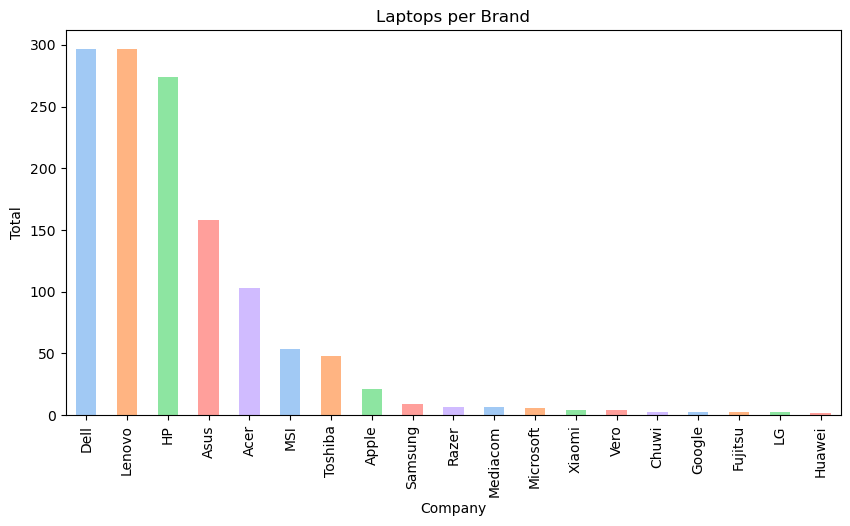

In [13]:
Company = df['Company'].value_counts()
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
Company.plot(kind='bar',color=myColors)
plt.ylabel('Total')
plt.title('Laptops per Brand')
plt.show()

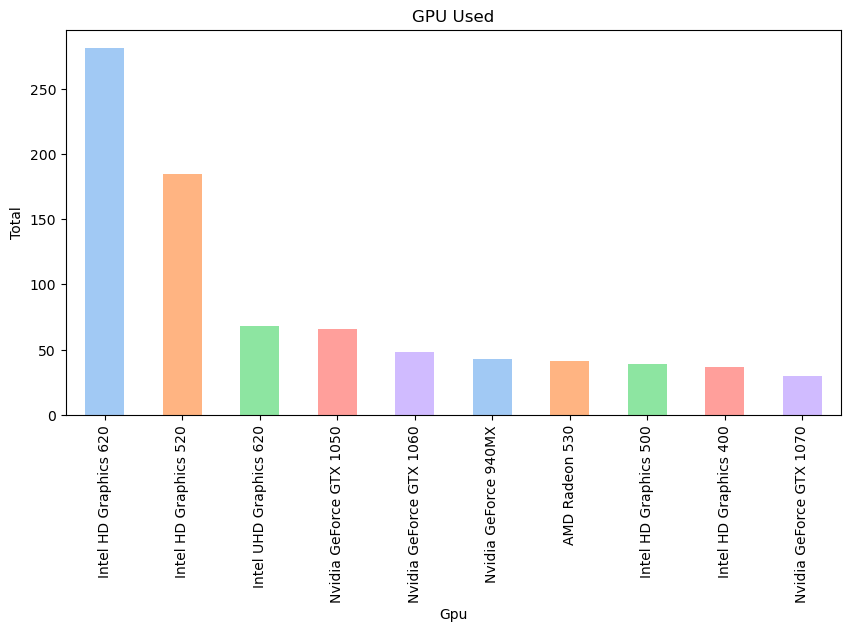

In [15]:
gpu = df['Gpu'].value_counts().head(10)
gpu = gpu.sort_values(ascending=False)
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
gpu.plot(kind='bar',color=myColors)
plt.ylabel('Total')
plt.title('GPU Used')
plt.show()

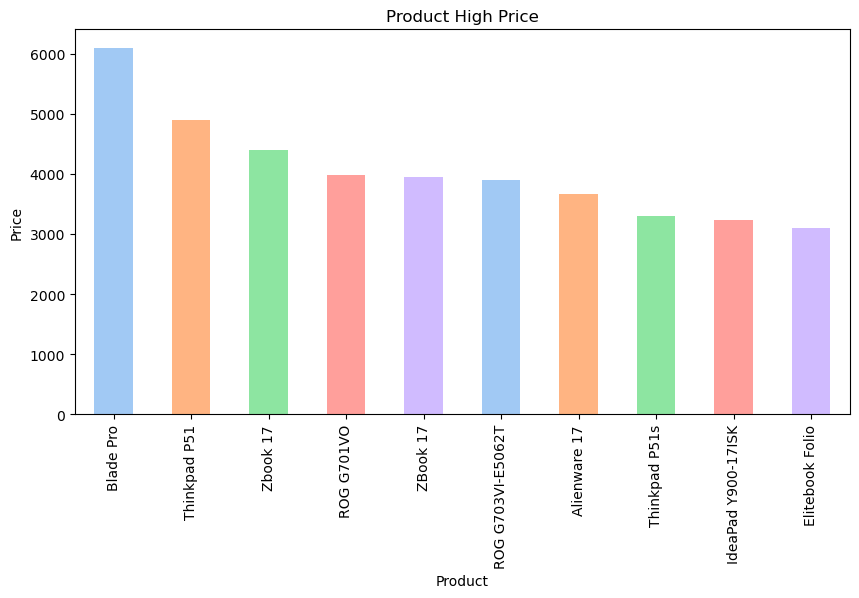

In [17]:
product_high_price = df.groupby('Product')['Price_euros'].max()
product_high_price = product_high_price.sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
myColors = sns.color_palette('pastel')[0:5]
product_high_price.plot(kind='bar',color=myColors)
plt.ylabel('Price')
plt.title('Product High Price')
plt.show()


In [19]:
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split

In [21]:
feature_cat = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
le = LabelEncoder()
df[feature_cat] = df[feature_cat].apply(le.fit_transform)

In [23]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,MacBook Pro,4,13.3,23,65,8,4,58,8,38,1339.69
1,2,1,Macbook Air,4,13.3,1,63,8,2,51,8,35,898.94
2,3,7,250 G6,3,15.6,8,74,8,16,53,4,74,575.00
3,4,1,MacBook Pro,4,15.4,25,85,1,29,9,8,71,2537.45
4,5,1,MacBook Pro,4,13.3,23,67,8,16,59,8,38,1803.60


In [25]:
X = df[['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']]
Y = df.iloc[:,  -1 : ]

In [27]:
scaler = RobustScaler()
df = scaler.fit_transform(X)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print('Train set size : ', X_train.shape, Y_train.shape)
print('Test set size  : ', X_test.shape, Y_test.shape)

Train set size :  (1042, 10) (1042, 1)
Test set size  :  (261, 10) (261, 1)


In [43]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
LinearReg = LinearRegression()
LinearReg.fit(X_train, Y_train)

LinearRegression()

In [55]:
YPredTest_LinReg = LinearReg.predict(X_test)
print("Score MSE data testing Regresi Linear = ", mean_squared_error(Y_test, YPredTest_LinReg), '\n')

Score MSE data testing Regresi Linear =  319120.89966798766 



In [35]:
LassoReg = Lasso(alpha=0.9)
LassoReg.fit(X_train, Y_train)

Lasso(alpha=0.9)

In [57]:
YPredTest_LassoReg = LassoReg.predict(X_test)
print("Score MSE data testing Regresi Lasso = ", mean_squared_error(Y_test, YPredTest_LassoReg), '\n')

Score MSE data testing Regresi Lasso =  319222.2544442433 



In [37]:
RidgeReg = Ridge(alpha=0.1)
RidgeReg.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [59]:
YPredTest_RidgeReg = RidgeReg.predict(X_test)
print("Score MSE data testing Regresi Ridge = ", mean_squared_error(Y_test, YPredTest_RidgeReg), '\n')

Score MSE data testing Regresi Ridge =  319120.7559110956 



In [39]:
SVReg = SVR()
SVReg.fit(X_train, Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [61]:
YPredTest_SVReg = SVReg.predict(X_test)
print("Score MSE data testing Regresi SV = ", mean_squared_error(Y_test, YPredTest_SVReg), '\n')

Score MSE data testing Regresi SV =  634636.9015583699 



In [41]:
DTReg = DecisionTreeRegressor(random_state=47)
DTReg.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=47)

In [63]:
YPredTest_DTReg = DTReg.predict(X_test)
print("Score MSE data testing Regresi DTR = ", mean_squared_error(Y_test, YPredTest_DTReg), '\n')

Score MSE data testing Regresi DTR =  152589.0235340996 



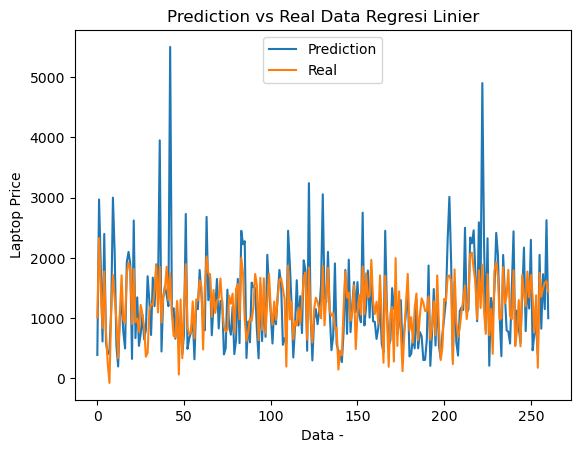

In [65]:
plt.plot(Y_test.values)
plt.plot(YPredTest_LinReg)
plt.title('Prediction vs Real Data Regresi Linier')
plt.xlabel('Data -')
plt.ylabel('Laptop Price')
plt.legend(labels=['Prediction','Real'])
plt.show()